In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
data = pd.read_excel(r'C:\Users\Sadiq Tijjani\Desktop\New_dataset.xlsx')

In [13]:
data.head()

,Date,opening,high,low,volume,difference
0,2020-12-01,19697.8,19897.4,18257.0,"582,98K","-2,83%"
1,2020-11-01,18394.6,19831.2,16235.2,"4,05M","42,77%"
2,2020-10-01,10776.6,14065.4,10387.6,"2,41M","28,04%"
3,2020-09-01,11644.2,12045.9,9877.1,"83,88M","-7,46%"
4,2020-08-01,11333.2,12444.1,10730.7,"15,39M","2,74%"


In [14]:
data.describe()

,opening,high,low
count,125.000000,125.000000,125.000000
mean,2965.964000,3584.923200,2507.803200
std,4293.762938,5114.344545,3708.423797
min,0.100000,0.100000,0.000000
25%,33.400000,95.700000,32.900000
50%,481.800000,627.900000,412.400000
75%,6365.900000,7358.400000,4143.400000
max,19697.800000,19897.400000,18257.000000


In [15]:
data.dtypes

Date          datetime64[ns]
opening              float64
high                 float64
low                  float64
volume                object
difference            object
dtype: object

In [17]:
def count_unique(column):
    return len(column.unique())##Showing how many values under each column

data.apply(count_unique, axis=0).astype(np.int32) 

Date          125
opening       119
high          124
low           119
volume        119
difference    119
dtype: int32

In [16]:
data.isnull().any() ##Checking for Null Values

Date          False
opening       False
high          False
low           False
volume        False
difference    False
dtype: bool

Text(0, 0.5, 'Opening Bitcoin Price')

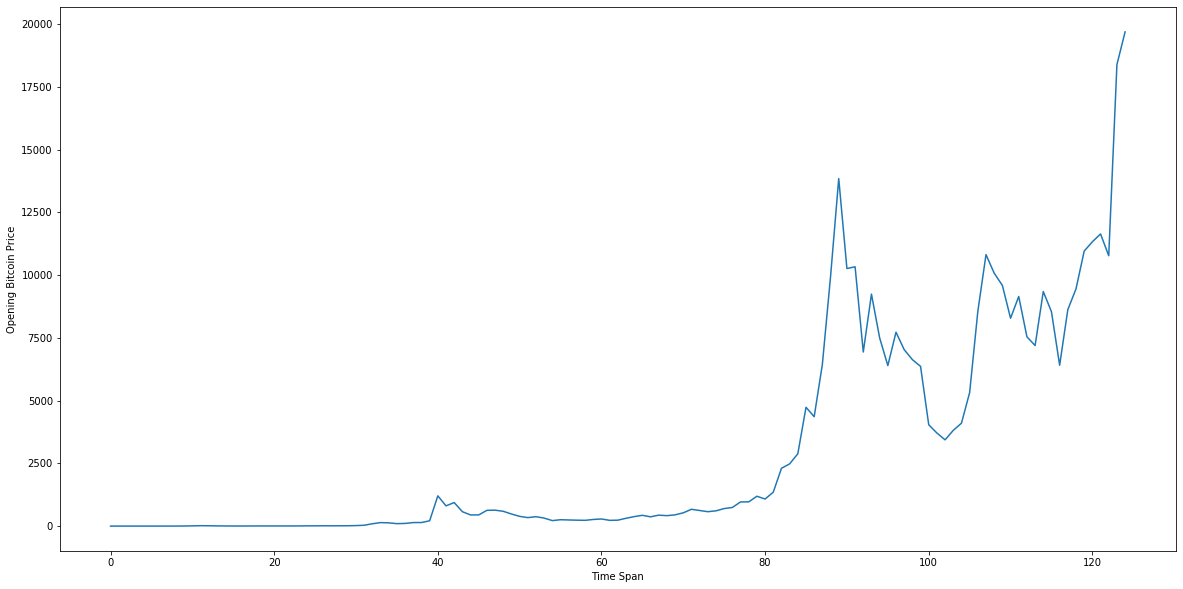

In [90]:
price_data = data[data.opening>=0.1].sort_values('Date')##values of opening price
plt.figure(figsize=(20, 10))  # Set figsize to increase size of the figure
plt.plot(price_data.opening.values)##all values
plt.xlabel('Time Span')
plt.ylabel('Opening Bitcoin Price')

In [106]:
##first part of project is done, Prediction fucntion begins here
##I have to use a different dataset because the dataset used above does not provide many tuples for training and testing
Ndata = pd.read_csv(r'C:\Users\Sadiq Tijjani\Desktop\bitcoin_price_analysis.csv')
Ndata.drop(['Open', 'High', 'Low', 'Volume', 'Market_Cap' ],1,inplace=True)
Ndata.drop(['Date'],1,inplace=True)
predictionDays = 30
# Create another column shifted 'n'  units up
Ndata['Prediction'] = Ndata[['Close']].shift(-predictionDays)
# show the first 5 rows
Ndata.head()

,Close,Prediction
0,11403.7,11600.1
1,11225.3,12899.2
2,10551.8,11607.4
3,11112.7,11474.9
4,10233.9,11188.6


In [107]:
Ndata.tail()

,Close,Prediction
1755,105.21,NaN
1756,116.99,NaN
1757,139.00,NaN
1758,144.54,NaN
1759,134.21,NaN


In [108]:
# Create the independent data set
# Here we will convert the data frame into a numpy array and drp the prediction column
x = np.array(Ndata.drop(['Prediction'],1))
# Remove the last 'n' rows where 'n' is the predictionDays
x = x[:len(Ndata)-predictionDays]
print(x)

[[11403.7]
 [11225.3]
 [10551.8]
 ...
 [  128.8]
 [  132.3]
 [  129. ]]


In [109]:
# Create the dependent data set
# convert the data frame into a numpy array
y = np.array(Ndata['Prediction'])
# Get all the values except last 'n' rows
y = y[:-predictionDays]
print(y)



[11600.1  12899.2  11607.4  ...   139.     144.54   134.21]


In [110]:
# Splitting the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2)
# set the predictionDays array equal to last 30 rows from the original data set
predictionDays_array = np.array(Ndata.drop(['Prediction'],1))[predictionDays:]
print(predictionDays_array)

[[11600.1 ]
 [12899.2 ]
 [11607.4 ]
 ...
 [  139.  ]
 [  144.54]
 [  134.21]]


In [111]:
from sklearn.svm import SVR
# Creating and Training the Support Vector Machine (Regression) using radial basis function
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(xtrain, ytrain)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [112]:
svr_accuracy = svr_rbf.score(xtest,ytest)
print('SVR_RBF accuracy :',svr_accuracy) ##We have achieved 76.8% accuracy

SVR_RBF accuracy : 0.7685683772418391


In [113]:
# print the predicted values
svm_prediction = svr_rbf.predict(xtest)
print(svm_prediction)
print()
print(ytest)

[  409.30234835   823.96763536   543.02182532   106.5817851
   693.92670392   453.99297509   645.07731027  2320.45532811
   459.7575622    309.82411752   261.74938259   592.629875
   250.41547769   616.08170164   418.4084465    346.43060997
   114.54834999   106.37965497   112.85134574   697.2666036
  1030.35243809   106.2934879    686.70402412   487.23759122
  1036.31438169   413.59383941   465.96109737   369.49915914
   643.89465607   698.95737853  7748.00148998   391.37741163
  3934.11021053  2520.46651066   290.74598915   228.08148758
  4319.5279985    293.18120623   107.87276305  1182.00770199
   117.43671432   560.6122915    809.54136526   709.1461056
   237.15311918   974.93948898   581.18791584   810.23604033
   471.39369921   225.12948507   594.29528258   260.13358876
   438.93991832  6610.33496975   358.21183992   106.55531974
  6677.62823178   949.89400784   607.45395351   369.9153882
   619.61993794   600.13972379   456.71044786   271.72089576
   640.96470114  1100.35299114

In [114]:
# Print the model predictions for the next 30 days
svm_prediction = svr_rbf.predict(predictionDays_array)
print(svm_prediction)
print()
#Print the actual price for bitcoin for last 30 days
print(Ndata.tail(predictionDays))

[9897.47867238 7577.03112794 9824.12187794 ...  121.89844587  126.62259977
  118.21223822]

       Close  Prediction
1730  129.75         NaN
1731  133.48         NaN
1732  131.98         NaN
1733  133.20         NaN
1734  126.70         NaN
1735  123.89         NaN
1736  122.88         NaN
1737  122.00         NaN
1738  121.99         NaN
1739  123.50         NaN
1740  123.02         NaN
1741  118.76         NaN
1742  114.22         NaN
1743  111.50         NaN
1744  117.98         NaN
1745  115.00         NaN
1746  115.24         NaN
1747  117.20         NaN
1748  112.67         NaN
1749  113.57         NaN
1750  111.50         NaN
1751  112.30         NaN
1752  115.91         NaN
1753  112.50         NaN
1754   97.75         NaN
1755  105.21         NaN
1756  116.99         NaN
1757  139.00         NaN
1758  144.54         NaN
1759  134.21         NaN


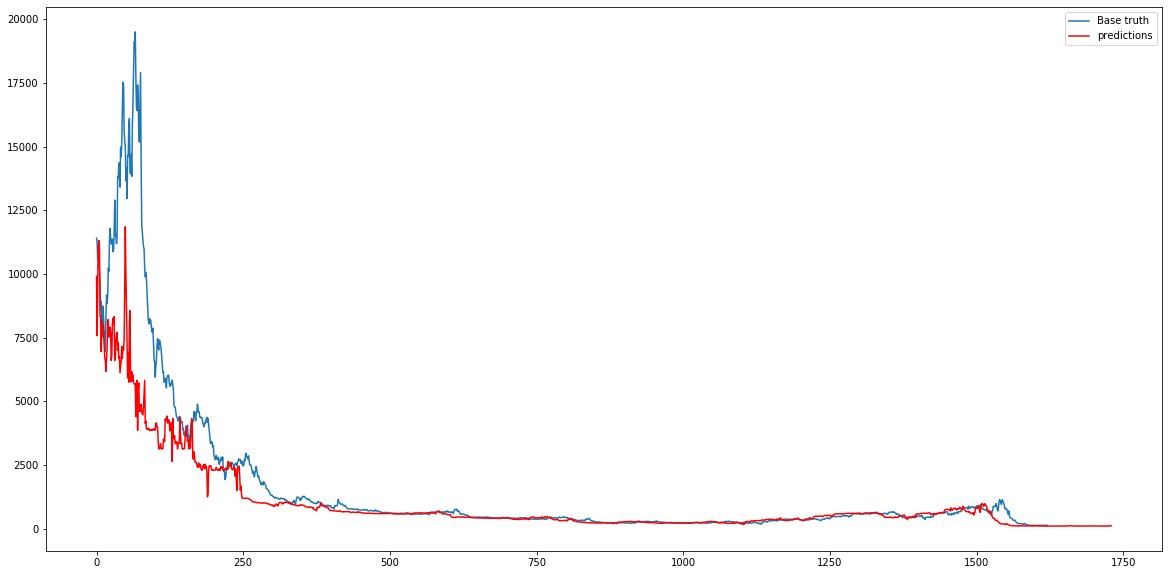

In [121]:
#Plotting both  in the same plot
Ndata1 = pd.read_csv(r'C:\Users\Sadiq Tijjani\Desktop\bitcoin_price_analysis.csv')
compare_data = Ndata1[Ndata1.Close >= 129.75]#Selecting for values after  the closing price hitting 129.75
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(compare_data.Close.values[:1731], label="Base truth")
plt.plot(svm_prediction, c='r', label="predictions")
plt.legend()